In [ ]:
# Task 3 - Project on Close Relationship preferences

In [ ]:
import pandas as pd
df = pd.read_excel('close.xlsx',sheet_name='data')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,age,gender,country
0,1,5,5,5,1,5,1,5,1,5,1,5,1,2,5,5,1,5,4,5,1,1,1,5,5,5,5,4,5,5,5,5,5,5,5,5,32,2,US
1,1,1,5,1,1,1,1,1,1,1,1,5,1,1,5,5,1,1,5,5,1,5,1,1,5,1,5,1,5,5,5,5,5,1,5,5,35,1,US
2,1,5,5,5,3,5,1,5,1,5,2,3,1,5,4,4,3,5,5,2,2,1,1,3,2,2,4,2,3,4,4,4,4,4,3,2,19,1,IL
3,4,5,1,4,5,5,5,1,1,3,4,4,4,4,2,4,4,3,4,2,5,2,4,4,5,3,4,4,2,3,2,4,4,5,4,3,32,1,US
4,4,5,3,4,4,4,3,4,2,2,4,2,3,4,4,3,2,4,4,4,3,2,2,5,4,3,4,5,4,5,4,4,5,5,5,4,27,1,IE


In [ ]:
df.shape

(51491, 39)

In [ ]:
df2 = df[df['country']=='US']

In [ ]:
df2['country'].value_counts()

US    27883
Name: country, dtype: int64

In [ ]:
df3 = df[df['country']=='IN']
df3['country'].value_counts()

IN    1371
Name: country, dtype: int64

In [ ]:
# Dataframe contains only 2 countries - India and US
data = pd.concat([df2, df3],ignore_index=True) 

In [ ]:
data.shape

(29254, 39)

In [1]:
# Score column is for consistency score
df['score'] = 0
df.head()

NameError: ignored

In [ ]:
import numpy as np

In [ ]:
for i in range(len(df)):
  # packet 1
  p = df['Q14'][i]
  q = df['Q2'][i]
  r = df['Q22'][i]
  r = 5-r
  a = [p,q,r]
  s = np.std(a)
  df['score'][i] = 5*(2-s)

In [ ]:
df.head(20)
df['score'].value_counts()

 7     12483
 5      9580
 3      3287
 2      1210
 1      1103
 10      806
 0       489
-1       296
Name: score, dtype: int64

In [ ]:
# buckets - 
'''
Q  28,32
Q  24,30
Q  27,25
Q  10,18
Q  26,20,16
Q  14,2,     X 22

'''

In [ ]:
# example - scoring scheme
p = 5
q = 1
a = [p,q]
s = np.std(a)
print(s)

# for 3 = 5*(2-s)
# 0, 0.47, 0.81, 0.94, ..., 1.88
# 10, 7.65, 5.95, ....., 0.6

# for 2 = 5*(2-s)
# 0, 0.5, 1, 1.5, 2

2.0


In [ ]:
# scoring scheme
for i in range(len(df)):
  # Packet 2
  p1 = df['Q28'][i]
  q1 = df['Q32'][i]
  a1 = [p1,q1]
  s1 = np.std(a1)
  df['score'][i] = df['score'][i] + (5*(2-s1))

In [ ]:
for i in range(len(df)):
  # Packet 3
  p1 = df['Q24'][i]
  q1 = df['Q30'][i]
  a1 = [p1,q1]
  s1 = np.std(a1)
  df['score'][i] = df['score'][i] + (5*(2-s1))

In [ ]:
for i in range(len(df)):
  # Packet 4
  p1 = df['Q25'][i]
  q1 = df['Q27'][i]
  a1 = [p1,q1]
  s1 = np.std(a1)
  df['score'][i] = df['score'][i] + (5*(2-s1))

In [ ]:
for i in range(len(df)):
  # Packet 5
  p1 = df['Q10'][i]
  q1 = df['Q18'][i]
  a1 = [p1,q1]
  s1 = np.std(a1)
  df['score'][i] = df['score'][i] + (5*(2-s1))

In [ ]:
for i in range(len(df)):
  # Packet 6
  p1 = df['Q26'][i]
  q1 = df['Q20'][i]
  r1 = df['Q16'][i]
  a1 = [p1,q1,r1]
  s1 = np.std(a1)
  df['score'][i] = df['score'][i] + (5*(2-s1))

In [ ]:
df['score'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

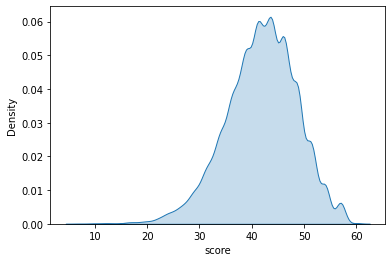

In [ ]:
# consistency score distribution
sns.kdeplot(data=df['score'], shade=True)

In [ ]:
# Highly inconsistent entries
cnt = 0

for i in range(len(df)):
  if df['score'][i] < 30 :
    cnt = cnt + 1

print(cnt)

1287


In [ ]:
# N1 dataframe contains consitent entries
n1 = df[df['score']>30]

In [ ]:
n1.shape

(27681, 41)

In [ ]:
n1['score'].unique()

array([50, 44, 46, 43, 36, 40, 34, 48, 33, 35, 45, 39, 51, 41, 47, 54, 37,
       49, 31, 32, 42, 38, 52, 57, 53, 55, 60])

In [ ]:
n1.to_csv('N1.csv') 

In [ ]:
n1.head()

In [ ]:
# reduce dimension - Remove all Qs in same bucket keeping one from each

n1.drop(['Q14', 'Q22'], axis=1)  # same as Q2
n1.shape

(27681, 41)

In [ ]:
n2 = n1.drop(['Q18', 'Q26', 'Q16', 'Q30', 'Q32', 'Q27'], axis=1)

In [ ]:
n2.head()
n2.shape

(27681, 35)

In [ ]:
n2.to_csv('N2.csv')

In [ ]:
## Hypothesis testing 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
n1 = pd.read_csv('N1.csv')
n1.head()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,age,gender,country,score
0,0,1,5,5,5,1,5,1,5,1,5,1,5,1,2,5,5,1,5,4,5,1,1,1,5,5,5,5,4,5,5,5,5,5,5,5,5,32,2,US,50
1,2,4,5,1,4,5,5,5,1,1,3,4,4,4,4,2,4,4,3,4,2,5,2,4,4,5,3,4,4,2,3,2,4,4,5,4,3,32,1,US,44
2,3,2,3,3,3,4,4,3,3,3,4,4,3,3,3,3,3,3,3,2,2,2,3,3,4,3,4,3,3,3,3,3,3,4,4,4,3,51,2,US,46
3,5,4,1,4,2,2,2,4,2,2,4,2,1,2,1,2,1,3,2,4,2,5,5,4,2,4,2,4,2,2,4,4,2,4,2,2,2,45,2,US,44
4,6,2,3,5,3,1,3,1,2,5,4,1,3,1,3,5,4,1,3,5,3,1,3,1,2,4,3,5,4,5,4,4,4,4,4,4,4,38,1,US,43


In [ ]:
n2 = pd.read_csv('N2.csv')
n2.head()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q17,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q28,Q29,Q31,Q33,Q34,Q35,Q36,age,gender,country,score
0,0,1,5,5,5,1,5,1,5,1,5,1,5,1,2,5,1,4,5,1,1,1,5,5,4,5,5,5,5,5,5,32,2,US,50
1,2,4,5,1,4,5,5,5,1,1,3,4,4,4,4,2,4,4,2,5,2,4,4,5,4,2,2,4,5,4,3,32,1,US,44
2,3,2,3,3,3,4,4,3,3,3,4,4,3,3,3,3,3,2,2,2,3,3,4,3,3,3,3,4,4,4,3,51,2,US,46
3,5,4,1,4,2,2,2,4,2,2,4,2,1,2,1,2,3,4,2,5,5,4,2,4,2,2,4,4,2,2,2,45,2,US,44
4,6,2,3,5,3,1,3,1,2,5,4,1,3,1,3,5,1,5,3,1,3,1,2,4,4,5,4,4,4,4,4,38,1,US,43


In [ ]:
# HP - 1 -- 
# relevant Q 28,32,34,6,4
# In a romantic partnership, young males (<30) are more anxious and insecure than young females.

In [ ]:
# Total young (age<30) males and females

ym = 0
yf = 0
n1['H1'] = 0

for i in range(len(n1)):
  if float(n1['age'][i]) <30:
   if n1['gender'][i]==1 :
     ym = ym + 1
     n1['H1'][i] = 1 
   if n1['gender'][i]==2 : 
     yf = yf + 1
     n1['H1'][i] = 2


print(ym,yf)

In [ ]:
n1['H1'].value_counts()

2    13079
0     8815
1     5787
Name: H1, dtype: int64

In [ ]:
# H1 score = measure of how anxious and insecure they feel

n1['H1_score'] = 0

for i in range(len(n1)):
  if n1['H1'][i]>0 :
    n1['H1_score'][i] = 5*(5-n1['Q28'][i]) + 3*(5-n1['Q34'][i]) + 1*(5-n1['Q32'][i]) + 5*(5-n1['Q6'][i]) + 5*(5-n1['Q4'][i])


In [ ]:
# average H1 score of two classes

mt = 0
ft = 0

for i in range(len(n1)):
  if (n1['H1'][i]==1) :
    mt = mt + n1['H1_score'][i] 
  elif (n1['H1'][i]==2) :
    ft = ft + n1['H1_score'][i]

print(mt,ft)
mt = mt/5787
ft = ft/13079 
print("Avg score : ",mt,ft)

184309 403564
Avg score :  31.848799032313806 30.855875831485587


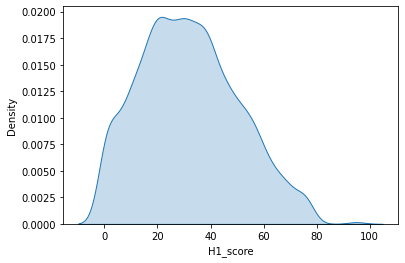

In [ ]:
# H1 score distribution of young males

n1m = n1[n1['H1']==1]
sns.kdeplot(data=n1m['H1_score'], shade=True)

In [ ]:
# median

n1m['H1_score'].median()

31.0

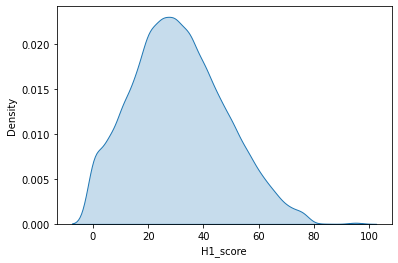

In [ ]:
# H1 score distribution of young females

n1f = n1[n1['H1']==2]
sns.kdeplot(data=n1f['H1_score'], shade=True)

In [ ]:
# median

n1f['H1_score'].median()

30.0

In [ ]:
# conclusion - slight difference in H1 scores. Male score = 31.84, female score = 30.85
# Males feel slightly more anxious and insecure than females

In [ ]:
# H2 - Q - 1,9,15,25,27,31
# In a partnership (romantic or non romantic), males are more expressive (less hesitant) than females.

In [ ]:
# H2 score = How expressive they are

n1['H2_score'] = 0
mt = 0
ft = 0
ms = 0
fs = 0

for i in range(len(n1)):
  if n1['gender'][i] == 1:
    ms = ms + 1
    n1['H2_score'][i] = n1['Q1'][i] + n1['Q9'][i] + (5-n1['Q15'][i]) + (5-n1['Q25'][i]) + (5-n1['Q27'][i]) + (5-n1['Q31'][i])
    mt = mt + n1['H2_score'][i]
  elif n1['gender'][i] == 2:
    fs = fs + 1
    n1['H2_score'][i] = n1['Q1'][i] + n1['Q9'][i] + (5-n1['Q15'][i]) + (5-n1['Q25'][i]) + (5-n1['Q27'][i]) + (5-n1['Q31'][i])
    ft = ft + n1['H2_score'][i]

print(mt,ft)
mt = mt/ms
ft = ft/fs
print('Avg score : ',mt,ft)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


93755 207424
Avg score :  11.037791382152108 11.037301122758475


In [ ]:
# conclusion - Males expressiveness score = 11.0377 and female expressiveness score = 11.0373
# very very less difference

In [ ]:
# H-3 Q3,7,23
# An American of age 30+ likes to be closer to romantic partners than an Indian of the same age does.

In [ ]:
# H3 score = Likeness to be closer to romantic partners

uss = 0
ins = 0
us_s = 0
in_s = 0
n1['H3'] = 0
n1['H3_score'] = 0

for i in range(len(n1)):
  if float(n1['age'][i]) >30:
   n1['H3_score'][i] = (5-n1['Q3'][i]) + (n1['Q7'][i]) + (n1['Q23'][i])
   if n1['country'][i]=='US' :
     uss = uss + 1
     n1['H3'][i] = 1 
     us_s = us_s + n1['H3_score'][i]
   elif n1['country'][i]=='IN' : 
     ins = ins + 1
     n1['H3'][i] = 2
     in_s = in_s + n1['H3_score'][i]


print(uss,ins)
print(us_s,in_s)
print("Avg score : ",(us_s/uss),(in_s/ins))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


7689 244
45525 1358
Avg score :  5.92079594225517 5.565573770491803


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
print(uss,ins)
print(us_s,in_s)
print("Avg score : ",(us_s/uss),(in_s/ins))

7689 244
45525 1358
Avg score :  5.92079594225517 5.565573770491803


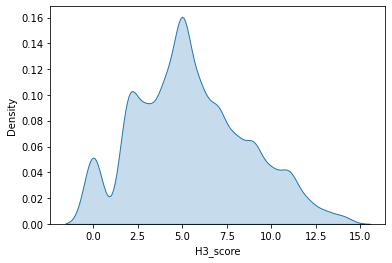

In [ ]:
# H3 score distribution of americans

n1u = n1[n1['country']=='US']
n1u = n1u[n1u['age']>=30]
sns.kdeplot(data=n1u['H3_score'], shade=True)

In [ ]:
n1u['H3_score'].median()

5.0

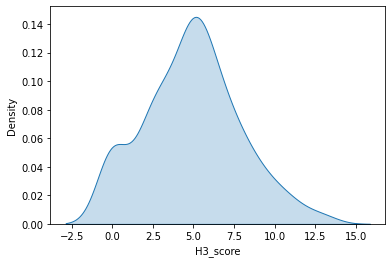

In [ ]:
# H3 score distribution of Indians

n1i = n1[n1['country']=='IN']
n1i = n1i[n1i['age']>=30]
sns.kdeplot(data=n1i['H3_score'], shade=True)

In [ ]:
n1i['H3_score'].median()

5.0

In [ ]:
print(n1u['H3_score'].mean())
print(n1i['H3_score'].mean())

5.530247813411079
4.920289855072464


In [ ]:
# conclusion - Indians score = 4.92, Americans score = 5.53
# Americans have more likeness to be closer to Romantic partners than Indians 

In [ ]:
# H-4 Q3,9,23,29,31  Q-1,15,25,27,35 
# Indians have similar expressiveness towards romantic as well as non romantic partners

In [ ]:
# Only Indians
df = n1[n1['country']=='IN']

In [ ]:
df.tail()

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,age,gender,country,score,H1,H1_score,H2_score,H3,H3_score,RP_score,P_score
27676,29249,4,5,3,5,3,5,2,5,3,5,1,4,4,5,3,4,4,5,4,5,5,1,3,5,3,4,2,5,5,5,5,5,5,5,5,5,19,2,IN,51,2,0,14,0,0,0,0
27677,29250,4,4,5,2,2,4,1,2,3,4,3,4,2,4,4,4,2,4,4,4,5,2,2,4,4,2,4,3,4,5,5,4,4,4,4,2,24,2,IN,46,2,34,10,0,0,0,0
27678,29251,2,4,4,5,3,4,2,5,5,4,4,4,2,5,5,4,2,2,1,1,4,2,2,4,3,4,3,4,4,4,5,4,4,4,4,3,21,1,IN,42,1,14,11,0,0,0,0
27679,29252,2,4,5,5,3,5,3,5,2,5,2,4,3,5,5,4,2,5,4,5,3,2,2,5,5,2,5,5,5,5,5,5,5,4,5,5,34,1,IN,48,0,0,4,2,5,0,0
27680,29253,1,4,4,4,1,4,1,5,1,5,1,3,1,4,5,2,1,5,5,5,2,2,1,5,5,2,5,4,5,5,5,5,5,4,5,3,22,2,IN,46,2,18,2,0,0,0,0


In [ ]:
# RP_score = expressiveness towards romantic partners
# P_score =  expressiveness towards partners

df['RP_score']=0
df['P_score']=0

for i in range(26431,27681):
  df['RP_score'][i] = df['Q9'][i] + df['Q23'][i] + (5-df['Q3'][i])+ (5-df['Q31'][i])+ (5-df['Q29'][i])
  df['P_score'][i] = df['Q1'][i] + (5-df['Q27'][i])+ (5-df['Q15'][i])+ (5-df['Q25'][i]) + (5-df['Q35'][i])


In [ ]:
df['RP_score'].value_counts()

In [ ]:
# Mean and median of scores

print(df['RP_score'].mean())
print(df['P_score'].mean())

print(df['RP_score'].median())
print(df['P_score'].median())

8.7752
8.1536
8.0
8.0


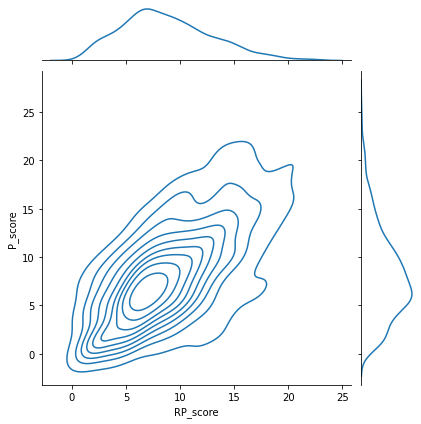

In [ ]:
# score distribution. RP score on X-axis and P_score on Y-axis
sns.jointplot(x=df['RP_score'], y=df['P_score'], kind="kde")

In [ ]:
# Conclusion - avg. RP_score = 8.77, avg. P_score = 8.15
# Indians have expressiveness to romantic partners not very biasely as compared to normal partners.

In [ ]:
#### testing on N2 dataset - dimensionality reduced set

In [ ]:
n2.columns

Index(['Unnamed: 0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q17', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q28', 'Q29', 'Q31', 'Q33', 'Q34', 'Q35',
       'Q36', 'age', 'gender', 'country', 'score', 'H1'],
      dtype='object')

In [ ]:
# HP - 1 -- 
# relevant Q 28,34,6,4
# In a romantic partnership, young males (<30) are more anxious and insecure than young females.

In [ ]:
# Total young (age<30) males and females

ym = 0
yf = 0
n2['H1'] = 0

for i in range(len(n2)):
  if float(n2['age'][i]) <30:
   if n2['gender'][i]==1 :
     ym = ym + 1
     n2['H1'][i] = 1 
   if n2['gender'][i]==2 : 
     yf = yf + 1
     n2['H1'][i] = 2


print(ym,yf)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


5787 13079


In [ ]:
# H1 score = measure of how anxious and insecure they feel

n2['H1_score'] = 0

for i in range(len(n2)):
  if n2['H1'][i]>0 :
    n2['H1_score'][i] = 5*(5-n2['Q28'][i]) + 3*(5-n2['Q34'][i]) + 5*(5-n2['Q6'][i]) + 5*(5-n2['Q4'][i])

In [ ]:
# average H1 score of two classes

mt = 0
ft = 0

for i in range(len(n2)):
  if (n2['H1'][i]==1) :
    mt = mt + n2['H1_score'][i] 
  elif (n2['H1'][i]==2) :
    ft = ft + n2['H1_score'][i]

print(mt,ft)
mt = mt/5787
ft = ft/13079

print('Avg score : ',mt,ft)

173314 381871
Avg score :  29.948850872645586 29.197262787674898


In [ ]:
# H2 - Q - 1,9,15,25,31
# In a partnership (romantic or non romantic), males are more expressive (less hesitant) than females.

In [ ]:
# H2 score = How expressive they are

n2['H2_score'] = 0
mt = 0
ft = 0
ms = 0
fs = 0

for i in range(len(n2)):
  if n2['gender'][i] == 1:
    ms = ms + 1
    n2['H2_score'][i] = n2['Q1'][i] + n2['Q9'][i] + (5-n2['Q15'][i]) + (5-n2['Q25'][i]) + (5-n2['Q31'][i])
    mt = mt + n2['H2_score'][i]
  elif n2['gender'][i] == 2:
    fs = fs + 1
    n2['H2_score'][i] = n2['Q1'][i] + n2['Q9'][i] + (5-n2['Q15'][i]) + (5-n2['Q25'][i]) + (5-n2['Q31'][i])
    ft = ft + n2['H2_score'][i]

print(mt,ft)
mt = mt/ms
ft = ft/fs
print('Avg score : ',mt,ft)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


81469 182401
Avg score :  9.591358606074877 9.705794710796573


In [ ]:
# H-3 Q3,7,23
# An American of age 30+ likes to be closer to romantic partners than an Indian of the same age does.

In [ ]:
# H3 score = Likeness to be closer to romantic partners

uss = 0
ins = 0
us_s = 0
in_s = 0
n2['H3'] = 0
n2['H3_score'] = 0

for i in range(len(n2)):
  if float(n2['age'][i]) >30:
   n2['H3_score'][i] = (5-n2['Q3'][i]) + (n2['Q7'][i]) + (n2['Q23'][i])
   if n1['country'][i]=='US' :
     uss = uss + 1
     n2['H3'][i] = 1 
     us_s = us_s + n2['H3_score'][i]
   elif n2['country'][i]=='IN' : 
     ins = ins + 1
     n2['H3'][i] = 2
     in_s = in_s + n2['H3_score'][i]


print(uss,ins)
print(us_s,in_s)
print("Avg score : ",(us_s/uss),(in_s/ins))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


7689 244
45525 1358
Avg score :  5.92079594225517 5.565573770491803


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# H-4 Q3,9,23,29  Q-1,15,25,35 
# Indians have similar expressiveness towards romantic as well as non romantic partners

In [ ]:
# Only Indians
df = n2[n2['country']=='IN']

In [ ]:
# RP_score = expressiveness towards romantic partners
# P_score =  expressiveness towards partners

df['RP_score']=0
df['P_score']=0

for i in range(26431,27681):
  df['RP_score'][i] = df['Q9'][i] + df['Q23'][i] + (5-df['Q3'][i]) + (5-df['Q29'][i])
  df['P_score'][i] = df['Q1'][i] + (5-df['Q15'][i])+ (5-df['Q25'][i]) + (5-df['Q35'][i])

In [ ]:
# Mean and median of scores

print(df['RP_score'].mean())
print(df['P_score'].mean())

print(df['RP_score'].median())
print(df['P_score'].median())

7.544
6.848
7.0
6.0


In [ ]:
### end ###